In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#reading the image which is to be masked

img=cv2.imread('/content/drive/MyDrive/brainhemorrhage/Hemorrhagic/19_0_12.jpg')

Text(0.5, 1.0, 'Original Image')

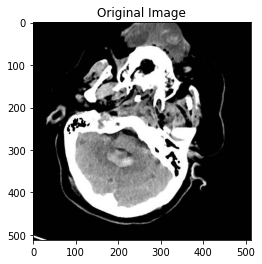

In [ ]:
plt.imshow(img)
plt.title('Original Image')

Text(0.5, 1.0, 'color filter')

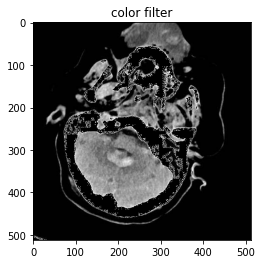

In [ ]:
#defining the lower bounds and upper bounds

lower_bound = np.array([0,0,0])
upper_bound= np.array([250,250,250])

#masking the image using inRange() function
#The image ranges from 0 to 255. The range 0 defines the black colour and the range 255 defines the white colour.

excluding_part = cv2.inRange(img,lower_bound,upper_bound)

clr_fltr=cv2.bitwise_and(img,img,mask=excluding_part) #using bitwise_and operation on the given two images

#displaying the resulting masked image

plt.imshow(clr_fltr) 
plt.title('color filter') 

Dilation and Erosion are two primary image operations in mathematical Morphology. Dilation is applied to binary images. The main effect of the dilation on a binary image is to continuously increase the boundaries of regions of foreground pixels (for example, white pixels, typically). Thus areas of foreground pixels expand in size while holes within those regions become smaller.

Text(0.5, 1.0, 'Erosion')

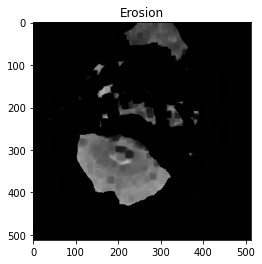

In [ ]:
# Creating kernel

kernel=np.ones((3,3),np.uint8)

# Using cv2.erode() method 

ersn=cv2.erode(clr_fltr,kernel,iterations=5)

#displaying the resulting image

plt.imshow(ersn)
plt.title('Erosion') 

Text(0.5, 1.0, 'Dilation')

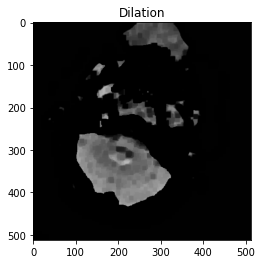

In [ ]:
dltn=cv2.dilate(ersn,kernel,iterations=1)
plt.imshow(dltn)
plt.title('Dilation')

## **Gray scale image**

Text(0.5, 1.0, 'crop')

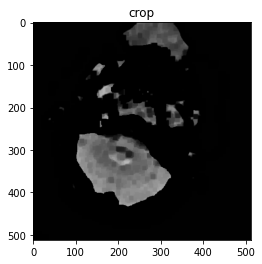

In [ ]:
#cv2.cvtColor() method is used to convert an image from one color space to another.

gray = cv2.cvtColor(dltn, cv2.COLOR_BGR2GRAY) #grayscale is a range of shades of gray without apparent color. 

#cv2.blur() method is used to blur an image using the normalized box filter.

gray = cv2.blur(gray, (11,11))

#get threshold image

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

#find contours
contours,hierarchy = cv2.findContours(thresh, 1, 2)
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if w>300 and h>300:
        break
crop = dltn[y:y+h, x:x+w]
plt.imshow(crop)
plt.title('crop')


## **Median Filter**

Text(0.5, 1.0, 'Median')

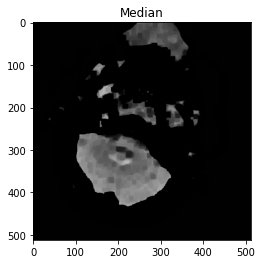

In [ ]:
 # Apply median filter to the crop image 
median = cv2.medianBlur(crop, ksize=1)

plt.imshow(median)
plt.title('Median')

## **Segmentation**

Text(0.5, 1.0, 'Hemorrhage area')

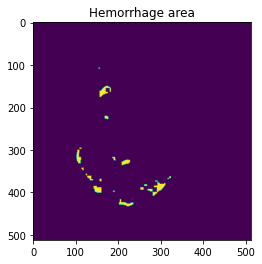

In [ ]:
median = cv2.cvtColor(median,cv2.COLOR_BGR2GRAY)

# threshold it
ret1,threshold1 = cv2.threshold(median,150,255,cv2.THRESH_BINARY)
ret3,threshold1 = cv2.threshold(threshold1,50,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)
ret4,threshold1 = cv2.threshold(threshold1,50,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)
ret2,threshold2 = cv2.threshold(median,0,255,cv2.THRESH_BINARY)
plt.imshow(threshold1)
plt.title('Hemorrhage area') 

Text(0.5, 1.0, 'Brain Area')

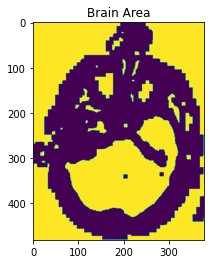

In [ ]:
plt.imshow(threshold2)
plt.title('Brain Area')

In [ ]:
area1 = cv2.countNonZero(threshold1)
area2 = cv2.countNonZero(threshold2)
print("Hemorrhage area          : ",area1)
print('Total brain area         : ',area2)
print('Percentage of Hemorrhage : ',area1*100/area2,'%')

Hemorrhage area          :  2055
Total brain area         :  157391
Percentage of Hemorrhage :  1.3056655081929716 %
